In [6]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from collections import Counter
import re

sns.set(style="whitegrid")

PATH = "/Users/vignesh/Documents/Y4S1/FYP/Data/Vivace 2025_cleaned.xlsx"
df = pd.read_excel(PATH, sheet_name="Form responses 1")
df = df.loc[:, ~df.columns.str.contains("^Unnamed")]

df.shape, df.columns.tolist()


((54, 14),
 ['Timestamp',
  'School',
  'How did you know about our event?',
  'What did you like most about our booth?',
  'To what extent do you agree with the following statements?   [I understand better the role of the SMU Peer Helpers.]',
  'To what extent do you agree with the following statements?   [I hope to visit Cosy Haven when it opens in Week 3.]',
  'To what extent do you agree with the following statements?   [The information at the booth increased my awareness of mental wellbeing resources available in SMU.]',
  'To what extent do you agree with the following statements?   [I am interested to sign up for the PHA programme. ]',
  'To what extent do you agree with the following statements?   [I am keen to be part of the SMU Peer Helpers.]',
  'To what extent do you agree with the following statements?   [The SMU Peer Helpers play a crucial part in promoting mental wellbeing in SMU.]',
  'How would you rate your overall experience at our booth?',
  'What could be improved 

In [7]:
col_ts       = "Timestamp"
col_school   = "School"
col_channel  = "How did you know about our event?"
col_like     = "What did you like most about our booth?"
col_sat      = "How would you rate your overall experience at our booth?"
col_improve  = "What could be improved for future events?"
col_future   = "What else would you like to see from SMU Peer Helpers in the future?"
col_comments = "Any other comments"

# All Likert items (the bracketed ones)
likert_cols = [c for c in df.columns if c.startswith("To what extent do you agree")]

# Short labels for plots (extract text inside square brackets)
def short_label(c):
    m = re.search(r"\[(.+?)\]\s*$", c)
    return m.group(1) if m else c

likert_short = {c: short_label(c) for c in likert_cols}
likert_short


{'To what extent do you agree with the following statements?   [I understand better the role of the SMU Peer Helpers.]': 'I understand better the role of the SMU Peer Helpers.',
 'To what extent do you agree with the following statements?   [I hope to visit Cosy Haven when it opens in Week 3.]': 'I hope to visit Cosy Haven when it opens in Week 3.',
 'To what extent do you agree with the following statements?   [The information at the booth increased my awareness of mental wellbeing resources available in SMU.]': 'The information at the booth increased my awareness of mental wellbeing resources available in SMU.',
 'To what extent do you agree with the following statements?   [I am interested to sign up for the PHA programme. ]': 'I am interested to sign up for the PHA programme. ',
 'To what extent do you agree with the following statements?   [I am keen to be part of the SMU Peer Helpers.]': 'I am keen to be part of the SMU Peer Helpers.',
 'To what extent do you agree with the follo

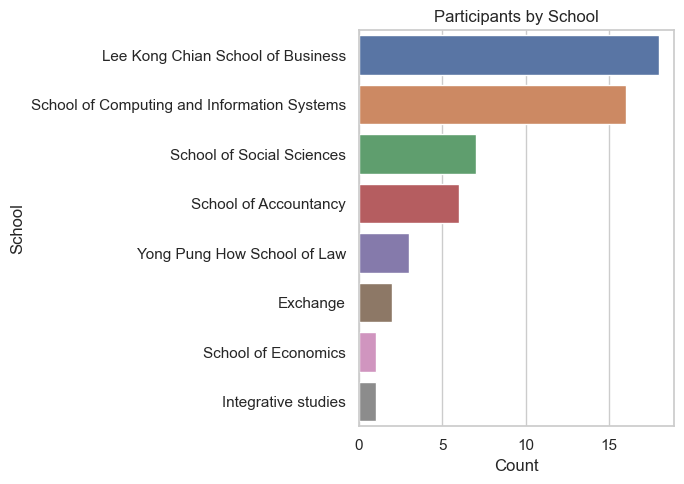

In [8]:
plt.figure(figsize=(7,5))
sns.countplot(data=df, y=col_school, order=df[col_school].value_counts().index)
plt.title("Participants by School")
plt.xlabel("Count"); plt.ylabel("School")
plt.tight_layout(); plt.show()


/Users/vignesh/anaconda3/lib/python3.11/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


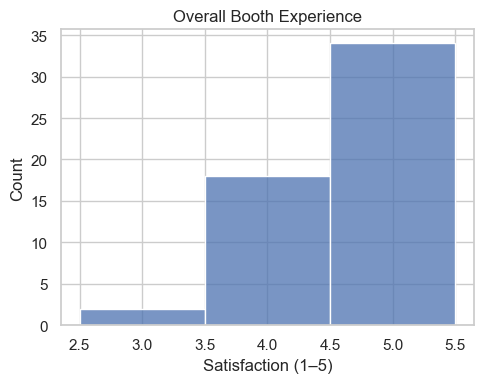

In [9]:
# ensure numeric (in case Excel stored as text)
df[col_sat] = pd.to_numeric(df[col_sat], errors="coerce")

plt.figure(figsize=(5,4))
sns.histplot(df[col_sat], bins=[1,2,3,4,5,6], discrete=True)
plt.title("Overall Booth Experience")
plt.xlabel("Satisfaction (1–5)"); plt.ylabel("Count")
plt.tight_layout(); plt.show()


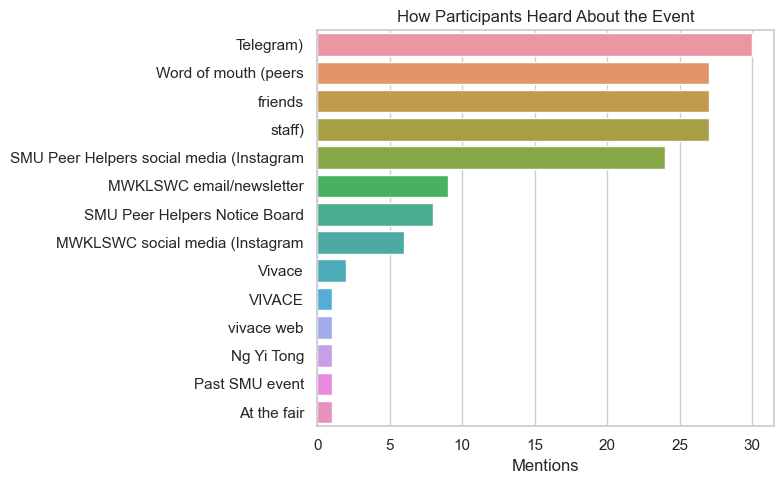

,Channel,Count
0,Telegram),30
1,Word of mouth (peers,27
2,friends,27
3,staff),27
4,SMU Peer Helpers social media (Instagram,24
5,MWKLSWC email/newsletter,9
6,SMU Peer Helpers Notice Board,8
7,MWKLSWC social media (Instagram,6
8,Vivace,2
9,VIVACE,1


In [10]:
channels_series = (df[col_channel].dropna().astype(str).str.split(r";|,"))
all_channels = []
for lst in channels_series:
    all_channels.extend([x.strip() for x in lst if x and str(x).strip()])

channel_counts = Counter(all_channels)
channel_df = pd.DataFrame(channel_counts.most_common(), columns=["Channel","Count"])

plt.figure(figsize=(8,5))
sns.barplot(data=channel_df, x="Count", y="Channel", orient="h")
plt.title("How Participants Heard About the Event")
plt.xlabel("Mentions"); plt.ylabel("")
plt.tight_layout(); plt.show()

channel_df


/Users/vignesh/anaconda3/lib/python3.11/site-packages/seaborn/_oldcore.py:1765: FutureWarning: unique with argument that is not not a Series, Index, ExtensionArray, or np.ndarray is deprecated and will raise in a future version.
  order = pd.unique(vector)


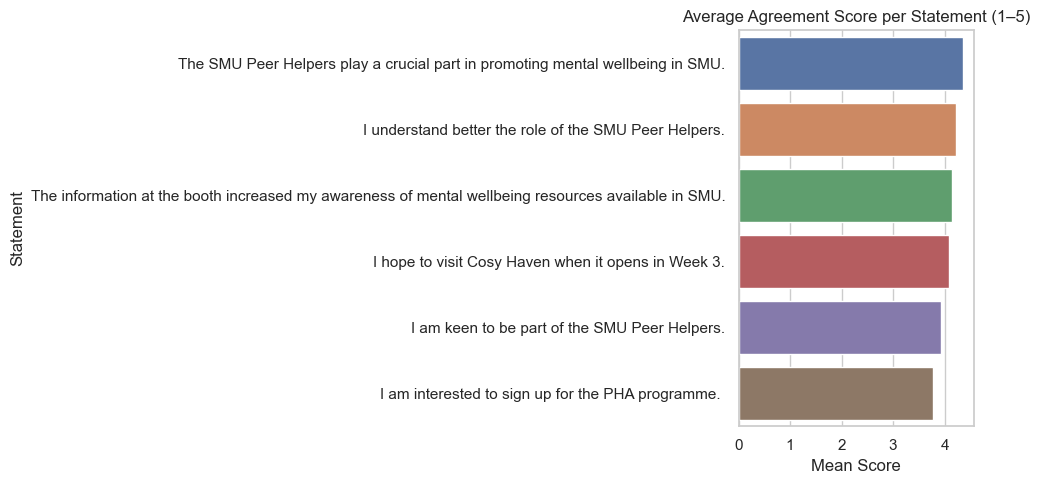

To what extent do you agree with the following statements?   [The SMU Peer Helpers play a crucial part in promoting mental wellbeing in SMU.]                         4.35
To what extent do you agree with the following statements?   [I understand better the role of the SMU Peer Helpers.]                                                  4.22
To what extent do you agree with the following statements?   [The information at the booth increased my awareness of mental wellbeing resources available in SMU.]    4.15
To what extent do you agree with the following statements?   [I hope to visit Cosy Haven when it opens in Week 3.]                                                    4.09
To what extent do you agree with the following statements?   [I am keen to be part of the SMU Peer Helpers.]                                                          3.93
To what extent do you agree with the following statements?   [I am interested to sign up for the PHA programme. ]                                

In [11]:
likert_map = {
    "Strongly disagree": 1,
    "Disagree": 2,
    "Neutral": 3,
    "Agree": 4,
    "Strongly agree": 5
}
order5 = list(likert_map.keys())

# numeric frame
df_likert_num = df[likert_cols].replace(likert_map)

# average per statement (sorted)
likert_means = df_likert_num.mean().sort_values(ascending=False)

plt.figure(figsize=(10,5))
sns.barplot(x=likert_means.values, y=[likert_short[c] for c in likert_means.index], orient="h")
plt.title("Average Agreement Score per Statement (1–5)")
plt.xlabel("Mean Score"); plt.ylabel("Statement")
plt.tight_layout(); plt.show()

likert_means.round(2)


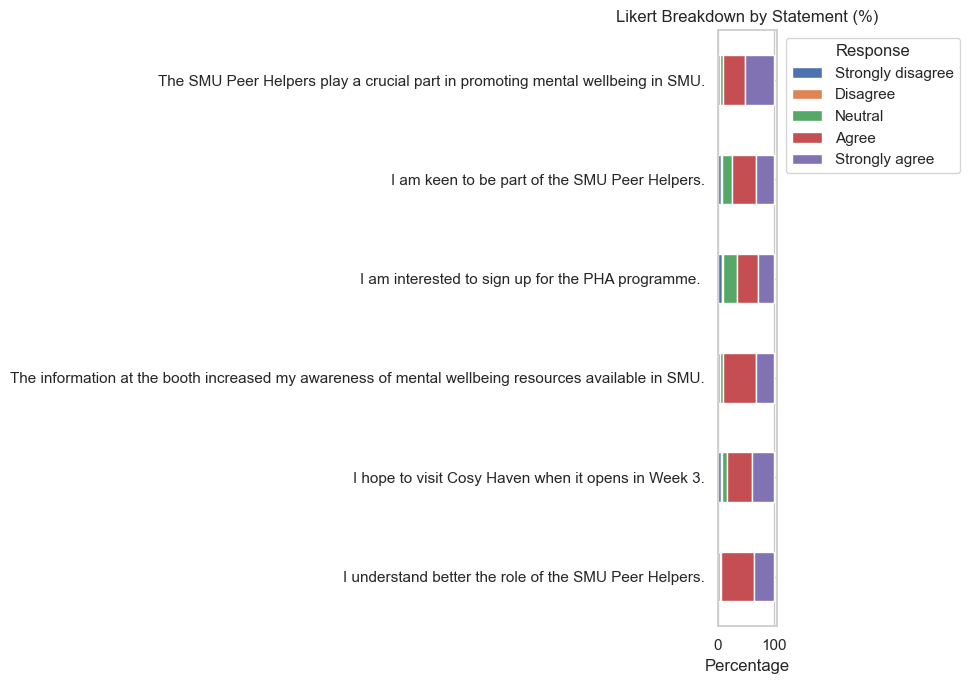

,Strongly disagree,Disagree,Neutral,Agree,Strongly agree
I understand better the role of the SMU Peer Helpers.,3.7,0.0,1.9,59.3,35.2
I hope to visit Cosy Haven when it opens in Week 3.,5.6,1.9,9.3,44.4,38.9
The information at the booth increased my awareness of mental wellbeing resources available in SMU.,3.7,0.0,5.6,59.3,31.5
I am interested to sign up for the PHA programme.,7.4,1.9,24.1,38.9,27.8
I am keen to be part of the SMU Peer Helpers.,5.6,1.9,18.5,42.6,31.5
The SMU Peer Helpers play a crucial part in promoting mental wellbeing in SMU.,3.7,0.0,5.6,38.9,51.9


In [12]:
# proper Likert percentage stacks
pct_rows = []
for c in likert_cols:
    counts = df[c].value_counts(dropna=False).reindex(order5, fill_value=0)
    pct = counts / counts.sum() * 100
    pct.name = likert_short[c]
    pct_rows.append(pct)

likert_pct = pd.DataFrame(pct_rows).fillna(0)

ax = likert_pct[order5].plot(kind="barh", stacked=True, figsize=(10,7))
ax.set_title("Likert Breakdown by Statement (%)")
ax.set_xlabel("Percentage")
ax.legend(title="Response", bbox_to_anchor=(1.02, 1), loc="upper left")
plt.tight_layout(); plt.show()

likert_pct.round(1)


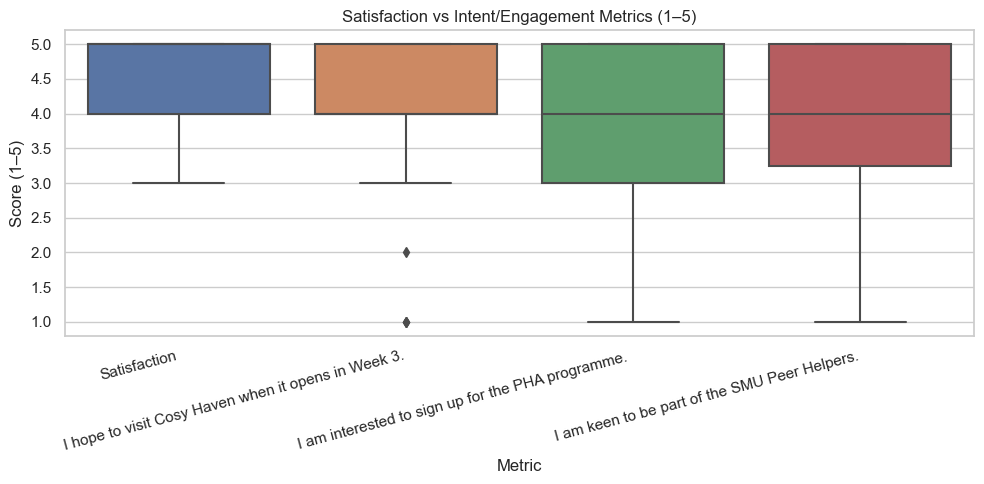

Metric
Satisfaction                                           4.59
I hope to visit Cosy Haven when it opens in Week 3.    4.09
I am keen to be part of the SMU Peer Helpers.          3.93
I am interested to sign up for the PHA programme.      3.78
Name: Score, dtype: float64

In [13]:
intent_cols = [c for c in likert_cols if any(k in c.lower() for k in [
    "hope to visit cosy haven", "interested to sign up", "keen to be part"
])]

df_intent_num = df[intent_cols].replace(likert_map)
compare_df = pd.DataFrame({"Satisfaction": df[col_sat]}).join(df_intent_num.rename(columns=likert_short))

m = compare_df.melt(var_name="Metric", value_name="Score").dropna()

plt.figure(figsize=(10,5))
sns.boxplot(data=m, x="Metric", y="Score")
plt.title("Satisfaction vs Intent/Engagement Metrics (1–5)")
plt.ylabel("Score (1–5)")
plt.xticks(rotation=15, ha="right")
plt.tight_layout(); plt.show()

m.groupby("Metric")["Score"].mean().sort_values(ascending=False).round(2)


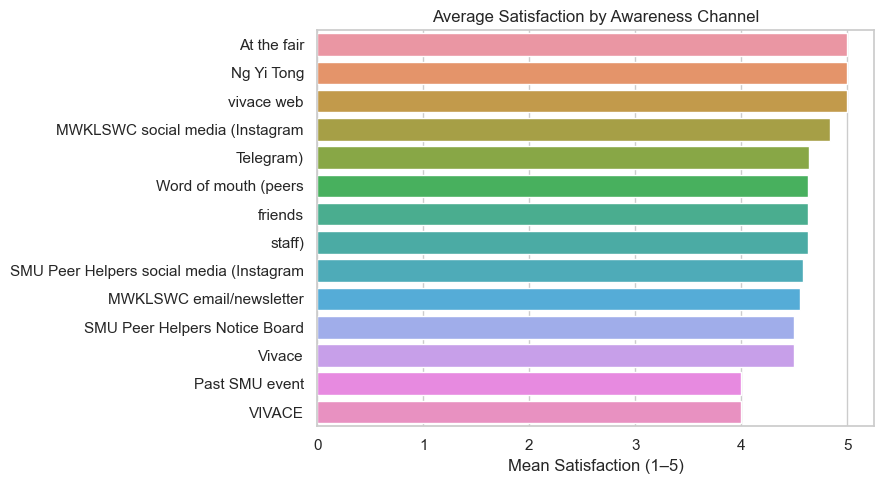

Channel
At the fair                                 5.00
Ng Yi Tong                                  5.00
vivace web                                  5.00
MWKLSWC social media (Instagram             4.83
Telegram)                                   4.63
Word of mouth (peers                        4.63
friends                                     4.63
staff)                                      4.63
SMU Peer Helpers social media (Instagram    4.58
MWKLSWC email/newsletter                    4.56
SMU Peer Helpers Notice Board               4.50
Vivace                                      4.50
Past SMU event                              4.00
VIVACE                                      4.00
Name: How would you rate your overall experience at our booth?, dtype: float64

In [14]:
# explode channels to long
ch_long = (df[[col_channel, col_sat]].dropna(subset=[col_channel])
             .assign(Channel=df[col_channel].astype(str).str.split(r";|,"))
             .explode("Channel"))
ch_long["Channel"] = ch_long["Channel"].astype(str).str.strip()
ch_long = ch_long[ch_long["Channel"] != ""]

chan_sat = ch_long.groupby("Channel")[col_sat].mean().sort_values(ascending=False)

plt.figure(figsize=(9,5))
sns.barplot(x=chan_sat.values, y=chan_sat.index)
plt.title("Average Satisfaction by Awareness Channel")
plt.xlabel("Mean Satisfaction (1–5)"); plt.ylabel("")
plt.tight_layout(); plt.show()

chan_sat.round(2)


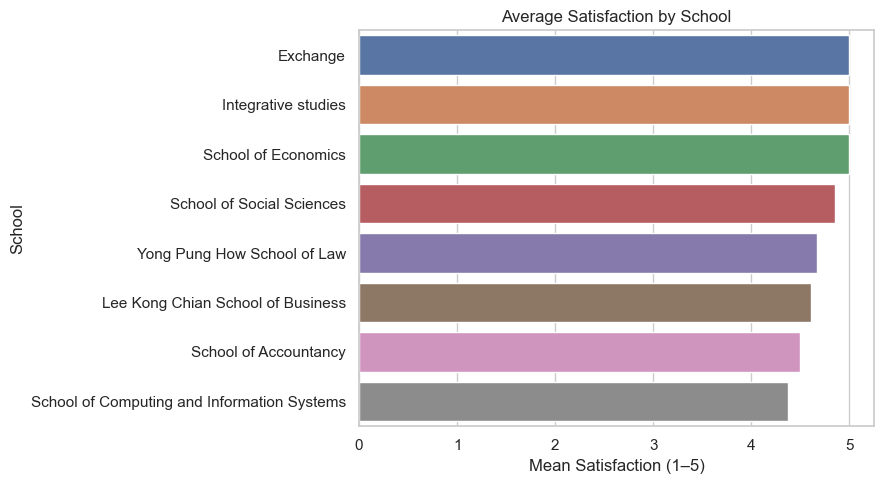

School
Exchange                                       5.00
Integrative studies                            5.00
School of Economics                            5.00
School of Social Sciences                      4.86
Yong Pung How School of Law                    4.67
Lee Kong Chian School of Business              4.61
School of Accountancy                          4.50
School of Computing and Information Systems    4.38
Name: How would you rate your overall experience at our booth?, dtype: float64

In [15]:
school_sat = df.groupby(col_school)[col_sat].mean().sort_values(ascending=False)

plt.figure(figsize=(9,5))
sns.barplot(x=school_sat.values, y=school_sat.index)
plt.title("Average Satisfaction by School")
plt.xlabel("Mean Satisfaction (1–5)"); plt.ylabel("School")
plt.tight_layout(); plt.show()

school_sat.round(2)


In [16]:
text_cols = [col_improve, col_future, col_comments]
text_blob = " ".join(df[text_cols].fillna("").astype(str).values.flatten())

words = re.findall(r"[A-Za-z']+", text_blob.lower())
stop = set("""
the a an and or to of in on at for with from by is are was were be been it its it's
this that those these i we you they our your their
""".split())

freq = Counter([w for w in words if w not in stop and len(w) > 2]).most_common(25)
pd.DataFrame(freq, columns=["word","count"])


,word,count
0,nil,37
1,more,9
2,maybe,3
3,great,3
4,nothing,3
5,joel,2
6,some,2
7,sessions,2
8,gifts,2
9,interactive,1


/Users/vignesh/anaconda3/lib/python3.11/site-packages/seaborn/_oldcore.py:1765: FutureWarning: unique with argument that is not not a Series, Index, ExtensionArray, or np.ndarray is deprecated and will raise in a future version.
  order = pd.unique(vector)


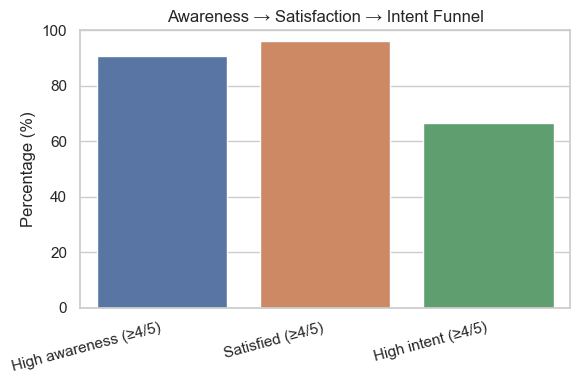

{'High awareness (≥4/5)': 90.74074074074075,
 'Satisfied (≥4/5)': 96.29629629629629,
 'High intent (≥4/5)': 66.66666666666666}

In [17]:
aware_col = [c for c in likert_cols if "increased my awareness of mental wellbeing resources" in c.lower()][0]
intent_col = [c for c in likert_cols if "interested to sign up for the pha programme" in c.lower()][0]

df_num = pd.DataFrame({
    "Awareness": df[aware_col].replace(likert_map),
    "Satisfaction": df[col_sat],  # already numeric
    "Intent": df[intent_col].replace(likert_map)
})

funnel = {
    "High awareness (≥4/5)": (df_num["Awareness"]   >= 4).mean()*100,
    "Satisfied (≥4/5)":      (df_num["Satisfaction"]>= 4).mean()*100,
    "High intent (≥4/5)":    (df_num["Intent"]      >= 4).mean()*100
}

plt.figure(figsize=(6,4))
sns.barplot(x=list(funnel.keys()), y=list(funnel.values()))
plt.title("Awareness → Satisfaction → Intent Funnel")
plt.ylabel("Percentage (%)"); plt.ylim(0,100)
plt.xticks(rotation=15, ha="right")
plt.tight_layout(); plt.show()

funnel
